In [2]:
import matplotlib.pyplot as plt
from latex import latexify
import numpy as np
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

latexify(columns = 2)

In [3]:
def getNewTimes():
    !g++ -std=c++17 Fib1.cpp && ./a.out
    !g++ -std=c++17 Fib2.cpp && ./a.out
    !g++ -std=c++17 Fib3.cpp && ./a.out
    !g++ -std=c++17 Fib4.cpp && ./a.out
    
    lTimes = []
    
    for i in range(1, 5):
        with open(f"output{i}.txt") as f:
            lines = f.readlines()
            tm = float(lines[2].split(" ")[2][:-2])
            lTimes.append(tm)
    
    return lTimes

In [37]:
t1 = getNewTimes()
t2 = getNewTimes()
t3 = getNewTimes()
t4 = getNewTimes()
t5 = getNewTimes()

T = [t1, t2, t3, t4, t5]

In [4]:
# df = pd.DataFrame(T)
# df.to_csv("times.csv", index=False)
df = pd.read_csv("times.csv")
T = df.to_numpy().tolist()
T1 = [T[i][0] for i in range(5)]
T2 = [T[i][1] for i in range(5)]
T3 = [T[i][2] for i in range(5)]
T4 = [T[i][3] for i in range(5)]

S2 = np.array([T1[i] / T2[i] for i in range(5)])
S3 = np.array([T1[i] / T3[i] for i in range(5)])
S4 = np.array([T1[i] / T4[i] for i in range(5)])

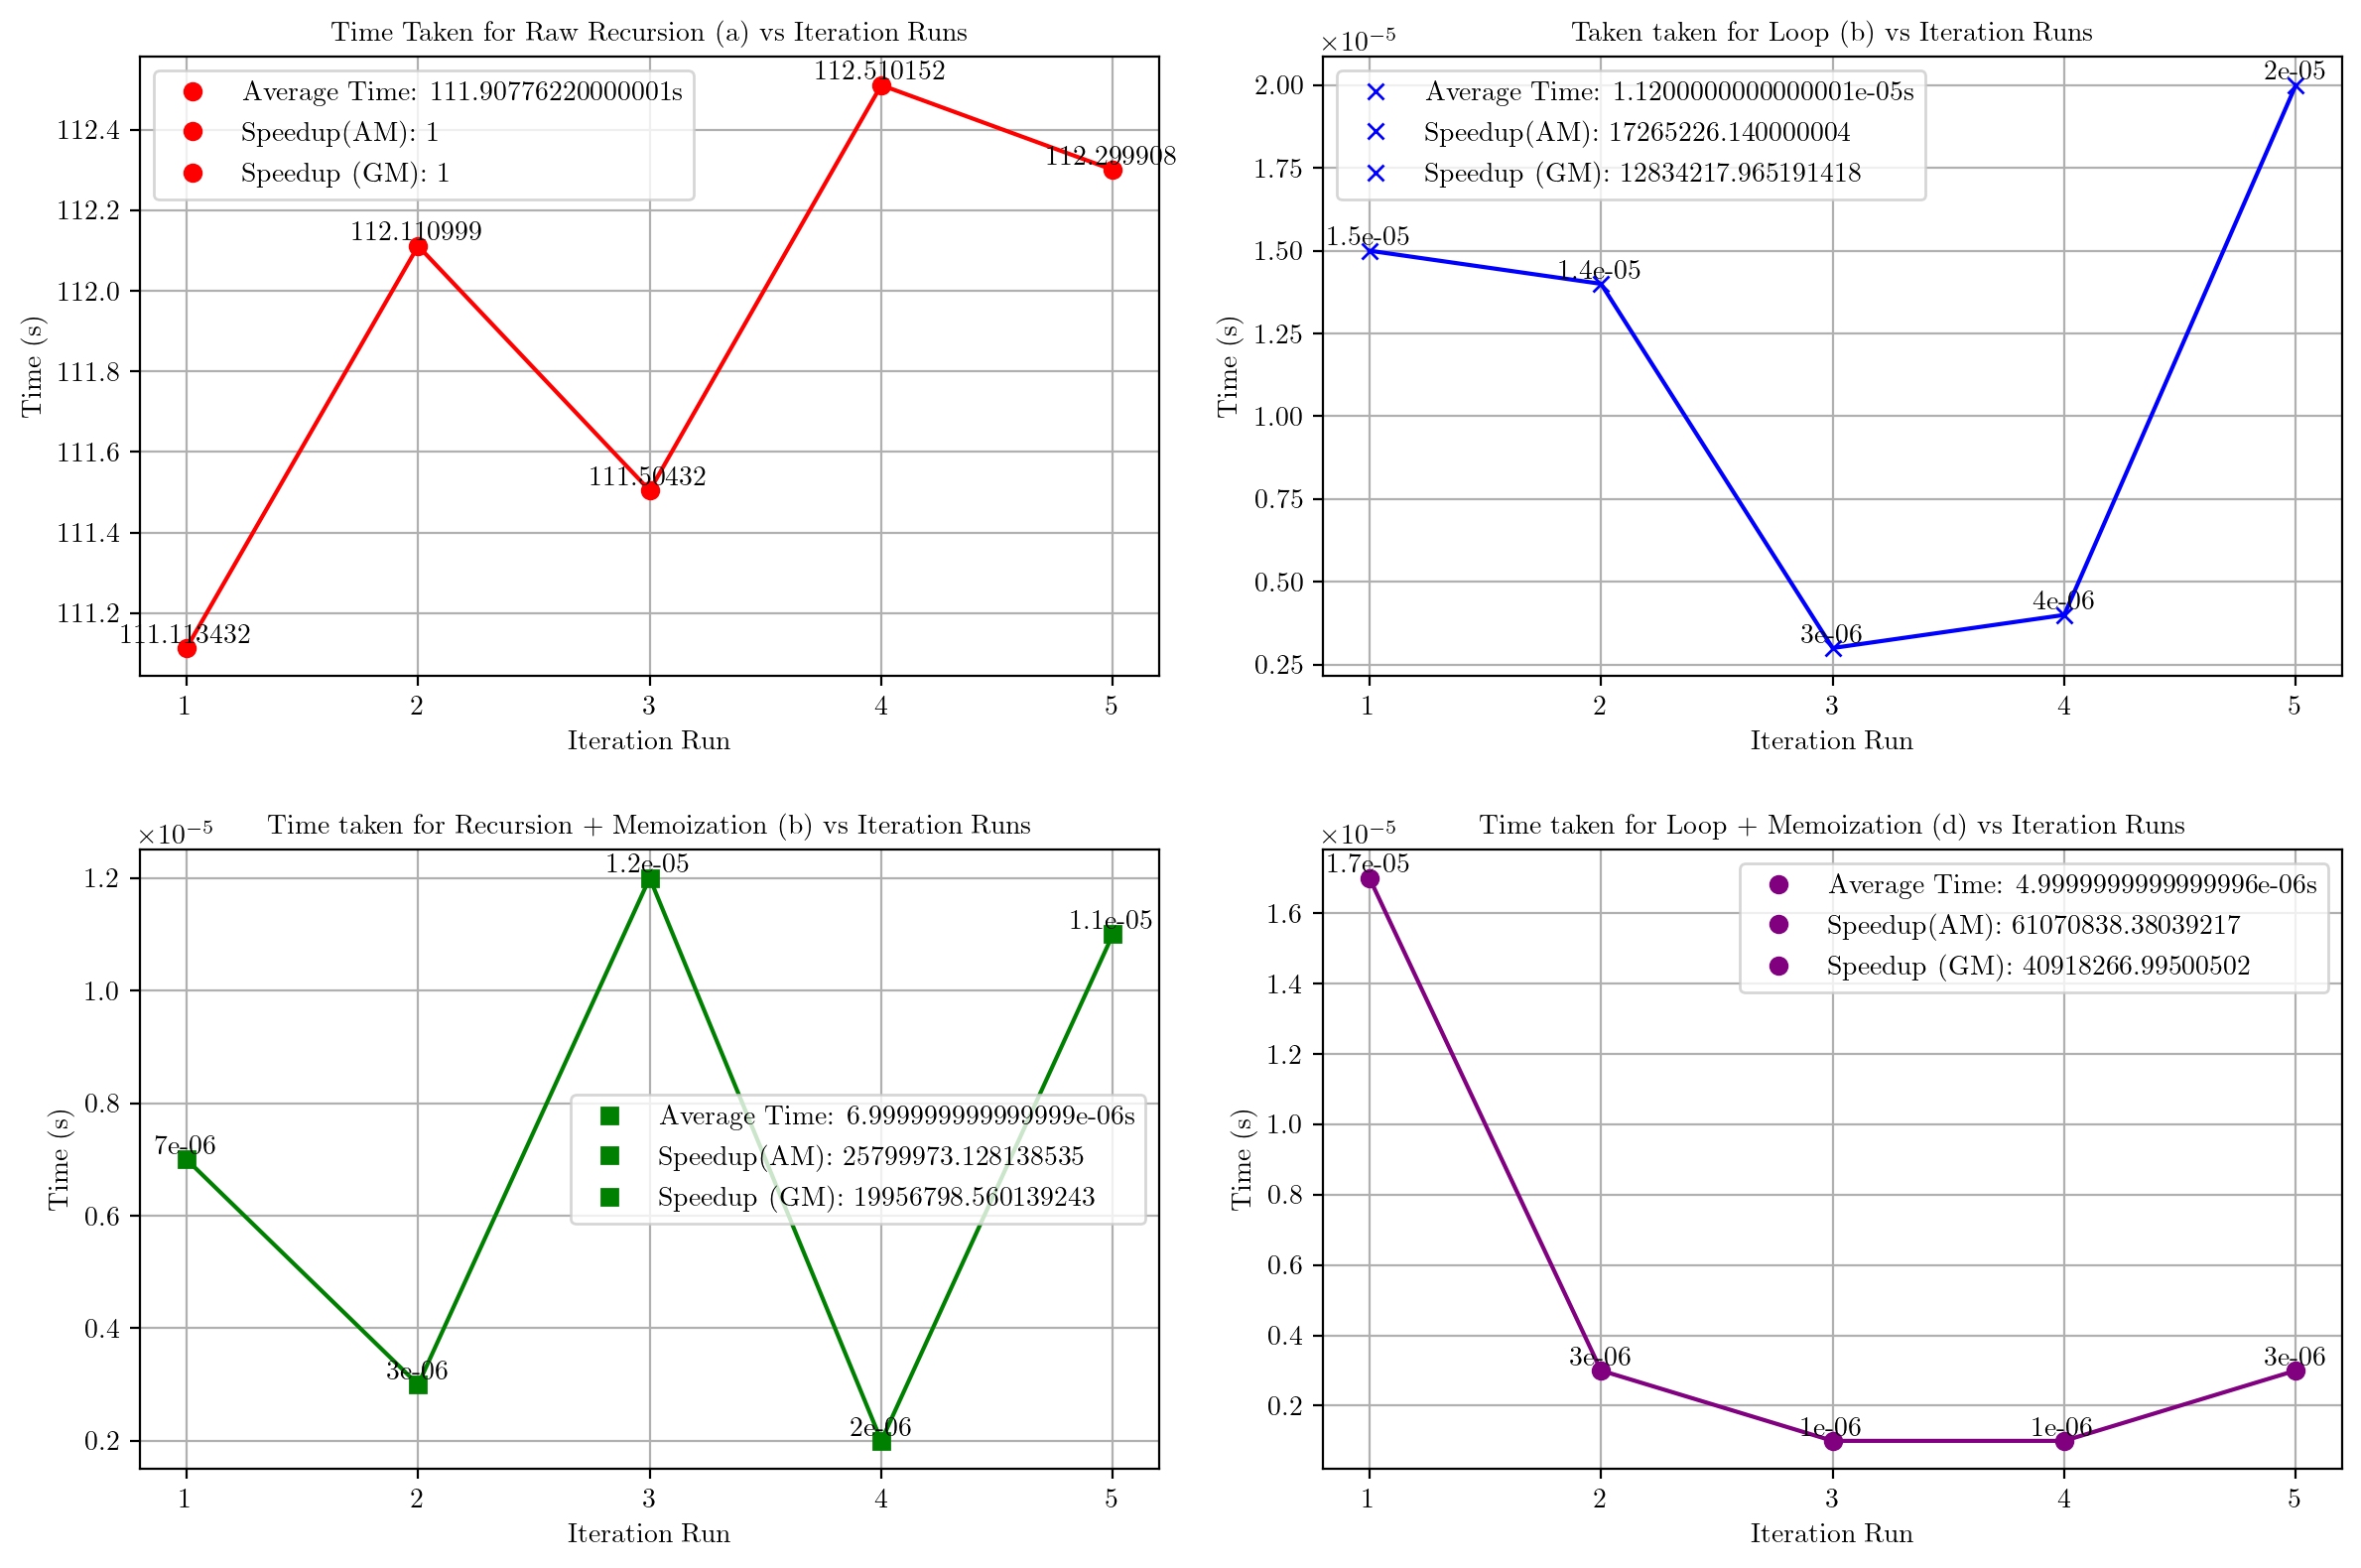

In [72]:
plt.figure(figsize = (12, 8))
plt.subplot(2, 2, 1)
plt.plot(T1, color = "red", marker = "o")
plt.plot([], [], 'o', color = "red", label = f"Average Time: {sum(T1) / len(T1)}s")
plt.plot([], [], 'o', color = "red", label = f"Speedup(AM): {1}")
plt.plot([], [], 'o', color = "red", label = f"Speedup (GM): {1}")
for i in range(5):
    plt.text(i, T1[i], f"{T1[i]}", ha = "center", va = "bottom")
plt.xticks(np.arange(5), np.arange(1, 6))
plt.xlabel("Iteration Run")
plt.ylabel("Time (s)")
plt.title("Time Taken for Raw Recursion (a) vs Iteration Runs")
plt.legend()
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(T2, color = "blue", marker = "x")
plt.plot([], [], 'x', color = "blue", label = f"Average Time: {sum(T2) / len(T2)}s")
plt.plot([], [], 'x', color = "blue", label = f"Speedup(AM): {S2.mean()}")
plt.plot([], [], 'x', color = "blue", label = f"Speedup (GM): {np.prod(S2) ** (1/5)}")
for i in range(5):
    plt.text(i, T2[i], f"{T2[i]}", ha = "center", va = "bottom")
plt.xticks(np.arange(5), np.arange(1, 6))
plt.xlabel("Iteration Run")
plt.ylabel("Time (s)")
plt.title("Taken taken for Loop (b) vs Iteration Runs")
plt.legend()
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(T3, color = "green", marker = "s")
plt.plot([], [], 's', color = "green", label = f"Average Time: {sum(T3) / len(T3)}s")
plt.plot([], [], 's', color = "green", label = f"Speedup(AM): {S3.mean()}")
plt.plot([], [], 's', color = "green", label = f"Speedup (GM): {np.prod(S3) ** (1/5)}")
for i in range(5):
    plt.text(i, T3[i], f"{T3[i]}", ha = "center", va = "bottom")
plt.xticks(np.arange(5), np.arange(1, 6))
plt.xlabel("Iteration Run")
plt.ylabel("Time (s)")
plt.title("Time taken for Recursion + Memoization (b) vs Iteration Runs")
plt.legend()
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(T4, color = "purple", marker = "o")
plt.plot([], [], 'o', color = "purple", label = f"Average Time: {sum(T4) / len(T4)}s")
plt.plot([], [], 'o', color = "purple", label = f"Speedup(AM): {S4.mean()}")
plt.plot([], [], 'o', color = "purple", label = f"Speedup (GM): {np.prod(S4) ** (1/5)}")
for i in range(5):
    plt.text(i, T4[i], f"{T4[i]}", ha = "center", va = "bottom")
plt.xticks(np.arange(5), np.arange(1, 6))
plt.xlabel("Iteration Run")
plt.ylabel("Time (s)")
plt.title("Time taken for Loop + Memoization (d) vs Iteration Runs")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [5]:
print(f"Average CPU Time taken for Raw Recursion (a): {sum(T1) / len(T1)}s")
print(f"Average CPU Time taken for Loop (b): {sum(T2) / len(T2)}s")
print(f"Average CPU Time taken for Recursion + Memoization (c): {sum(T3) / len(T3)}s")
print(f"Average CPU Time taken for Loop + Memoization (d): {sum(T4) / len(T4)}s")
print()
print("Speedup (AM) for Loop (b): ", S2.mean())
print("Speedup (GM) for Loop (b): ", np.prod(S2) ** (1/5))
print()
print("Speedup (AM) for Recursion + Memoization (c): ", S3.mean())
print("Speedup (GM) for Recursion + Memoization (c): ", np.prod(S3) ** (1/5))
print()
print("Speedup (AM) for Loop + Memoization (d): ", S4.mean())
print("Speedup (GM) for Loop + Memoization (d): ", np.prod(S4) ** (1/5))

Average CPU Time taken for Raw Recursion (a): 111.90776220000001s
Average CPU Time taken for Loop (b): 1.1200000000000001e-05s
Average CPU Time taken for Recursion + Memoization (c): 6.999999999999999e-06s
Average CPU Time taken for Loop + Memoization (d): 4.9999999999999996e-06s

Speedup (AM) for Loop (b):  17265226.140000004
Speedup (GM) for Loop (b):  12834217.965191418

Speedup (AM) for Recursion + Memoization (c):  25799973.128138535
Speedup (GM) for Recursion + Memoization (c):  19956798.560139243

Speedup (AM) for Loop + Memoization (d):  61070838.38039217
Speedup (GM) for Loop + Memoization (d):  40918266.99500502
